
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of stocks from the S&P 400.  Construct portfolios from the 400 stocks in the S&P 400 mid cap index and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['sp400-galaxy']
risk_free_rate = 0
annual_returns = '3 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,AA,Alcoa,US Stocks:Materials,1944.61,90.61,-21.45,16.02,5.04,77.46,28.96,61.13,16.02,0.26
1,ACHC,Acadia Healthcare,US Stocks:Healthcare,155.20,49.61,-4.67,17.11,24.69,28.70,17.12,26.24,17.11,0.65
2,ACM,AECOM,US Stocks:Industrials,85.28,54.89,10.78,24.93,29.00,12.91,8.59,23.74,24.93,1.05
3,ADC,Agree Realty,US Stocks:Real Estate,159.51,77.44,-6.12,2.90,5.41,22.75,10.78,18.39,2.90,0.16
4,ADNT,Adient,US Stocks:Consumer Discretionary,291.66,-3.65,7.96,1.78,17.99,30.27,10.54,41.11,1.78,0.04
5,AFG,American Financial Group,US Stocks:Financials,131.19,39.40,-6.99,26.12,16.52,16.30,10.06,21.93,26.12,1.19
6,AGCO,AGCO,US Stocks:Industrials,119.75,12.15,-6.35,10.50,20.78,29.17,11.85,35.09,10.50,0.30
7,AIRC,Apartment Income REIT,US Stocks:Real Estate,314.38,73.88,8.73,1.08,1.08,25.39,10.53,22.21,1.08,0.05
8,ALE,ALLETE,US Stocks:Utilities,249.02,89.45,-0.76,4.08,-0.24,29.86,5.07,23.86,4.08,0.17
9,ALGM,Allegro MicroSystems,US Stocks:Technology,209.52,-19.33,3.63,5.16,5.16,36.82,14.20,46.73,5.16,0.11


In [6]:
# Rank
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Subclass', num_per_group=1)
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered = rank_filtered.head(20)
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
372,VST,Vistra Corp,US Stocks:Utilities,247.40,85.81,67.42,30.17,14.73,20.94,11.35,27.52,30.17,1.10
186,KD,Kyndryl,US Stocks:Technology,503.15,258.65,96.41,96.41,96.41,33.69,13.32,57.87,96.41,1.67
192,KRG,Kite Realty Group Trust,US Stocks:Real Estate,221.52,35.94,15.57,19.81,15.81,29.56,10.48,27.83,19.81,0.71
303,RS,Reliance Steel & Aluminum Co.,US Stocks:Materials,50.92,31.31,40.87,35.46,33.86,19.43,11.42,29.38,35.46,1.21
72,CNM,Core & Main,US Stocks:Industrials,569.19,284.92,113.81,113.81,113.81,21.91,8.19,31.49,113.81,3.61
203,LNTH,Lantheus Holdings,US Stocks:Healthcare,-76.85,-36.59,27.15,61.20,33.07,110.59,93.34,63.08,61.20,0.97
5,AFG,American Financial Group,US Stocks:Financials,131.19,39.40,-6.99,26.12,16.52,16.30,10.06,21.93,26.12,1.19
65,CHRD,Chord Energy,US Stocks:Energy,44.27,17.76,36.63,84.91,111.61,22.48,11.76,44.18,84.91,1.92
77,COKE,Coca-Cola Consolidated,US Stocks:Consumer Staples,1819.38,354.56,84.11,51.80,39.99,24.17,7.47,45.18,51.80,1.15
166,HRB,H&R Block,US Stocks:Consumer Discretionary,125.85,63.71,36.23,50.56,19.01,21.72,12.48,32.28,50.56,1.57


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Ranked Portfolio'
}
top10 = list(rank_filtered['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': None},
    'Investment Option': {'weight_by': 'DS Vola'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,VST,KD,KRG,RS,CNM,LNTH,AFG,CHRD,COKE,HRB,TKO,Ranked Portfolio
Annual Returns,30.17,96.41,19.81,35.46,113.81,61.20,26.12,84.91,51.80,50.56,21.67,54.65
Std Dev,27.52,57.87,27.83,29.38,31.49,63.08,21.93,44.18,45.18,32.28,34.49,26.38
Sharpe Ratio,1.10,1.67,0.71,1.21,3.61,0.97,1.19,1.92,1.15,1.57,0.63,2.07
Weight,0.09,0.08,0.10,0.09,0.13,0.01,0.10,0.09,0.14,0.08,0.07,1.00
Worst Typical Down Year,-24.87,-19.33,-35.85,-23.30,50.83,-64.96,-17.74,-3.45,-38.56,-14.00,-47.31,1.89
Black Swan,-52.39,-77.20,-63.68,-52.68,19.34,-128.04,-39.67,-47.63,-83.74,-46.28,-81.80,-24.50


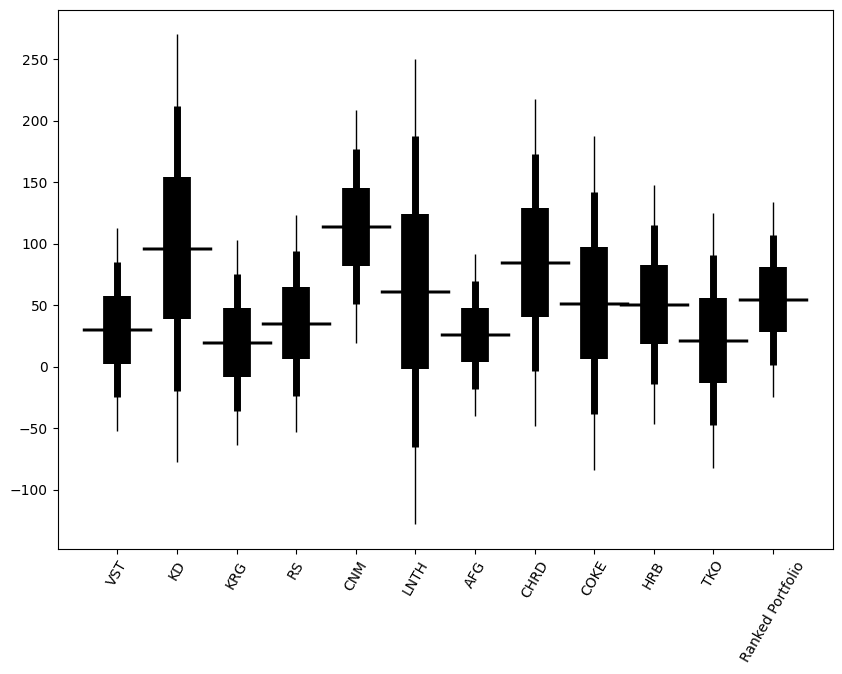

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

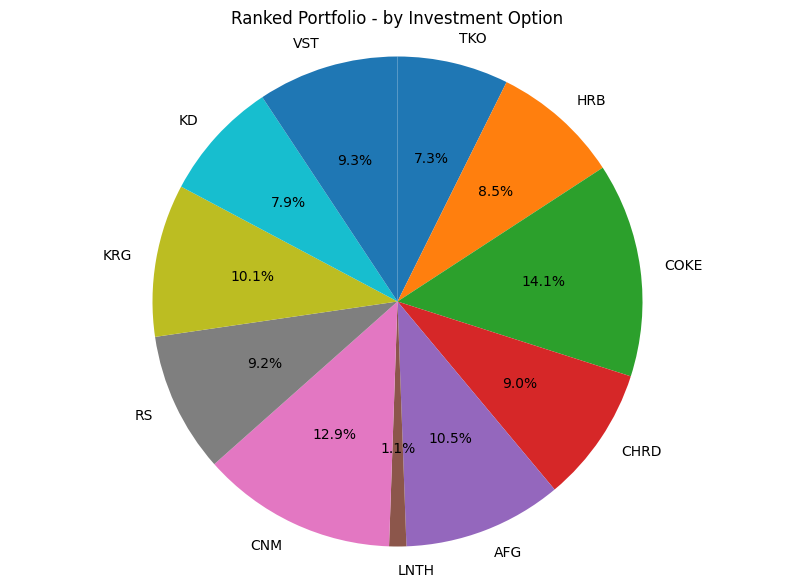

TKO    0.07
HRB    0.08
COKE   0.14
CHRD   0.09
AFG    0.10
LNTH   0.01
CNM    0.13
RS     0.09
KRG    0.10
KD     0.08
VST    0.09



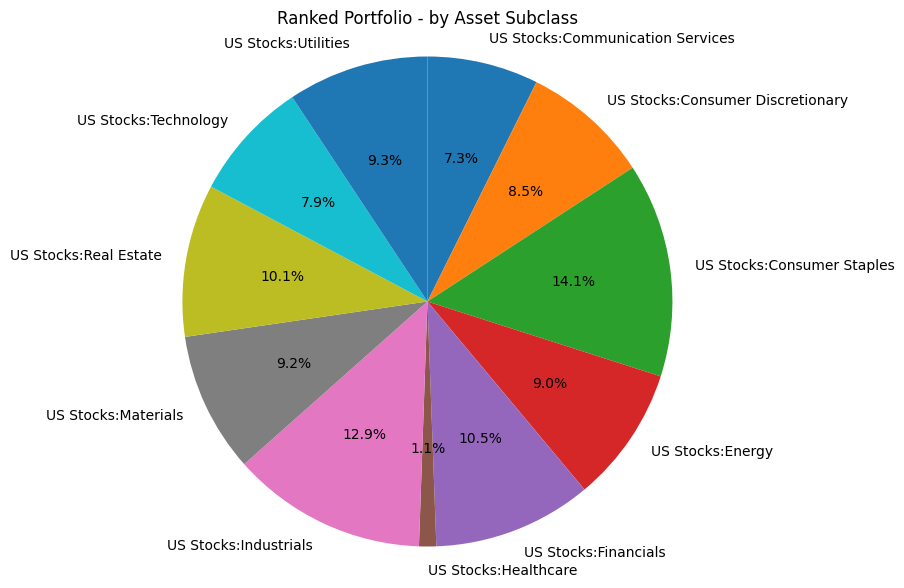

US Stocks:Communication Services   0.07
US Stocks:Consumer Discretionary   0.08
US Stocks:Consumer Staples         0.14
US Stocks:Energy                   0.09
US Stocks:Financials               0.10
US Stocks:Healthcare               0.01
US Stocks:Industrials              0.13
US Stocks:Materials                0.09
US Stocks:Real Estate              0.10
US Stocks:Technology               0.08
US Stocks:Utilities                0.09



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Subclass'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    VST                            0.0930
    KD                             0.0793
    KRG                            0.1008
    RS                             0.0925
    CNM                            0.1289
    LNTH                           0.0113
    AFG                            0.1050
    CHRD                           0.0898
    COKE                           0.1414
    HRB                            0.0846
    TKO                            0.0734


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer...............

Ranked Portfolio Metrics:          
    max_sharpe_ratio           2.77
    annual_return             80.82
    std_dev                   29.17
    worst typical down year   22.48
    black_swan                -6.69


Ranked Portfolio Weights:
    VST                            0.0000
    KD                             0.1200
    KRG                            0.0700
    RS                             0.0000
    CNM                            0.2600
    LNTH                           0.0000
    AFG                            0.0000
    CHRD                           0.3000
    COKE                           0.1300
    HRB                            0.1200
    TKO                            0.0000



### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).